# Accidents Analysis

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')

df = pd.read_csv('accidents_data.csv')

df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# Finding all columns
for col in df.columns:
    print(col)

ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [4]:
# Questions
# What are the accident rates for different weather conditions?
# What time of day do accidents occur most often?
# Which state has the most accidents?
# Top 15 most accident prone streets/roads

## Accidents per Top 12 Weather Conditions

In [5]:
# print(df['Weather_Condition'].unique())
"""
it would not be feasible to put all weather conditions and combinations onto one graph.
while it may be possible to include the combination conditions into one of the base conditions,
for the current sake of simplicity, only the base conditions will be used for this entire analysis
"""

'\nit would not be feasible to put all weather conditions and combinations onto one graph.\nwhile it may be possible to include the combination conditions into one of the base conditions,\nfor the current sake of simplicity, only the base conditions will be used for this analysis\n'

In [6]:
weather_condition_df = df['Weather_Condition'].value_counts().head(12)
weather_condition_names = df['Weather_Condition'].value_counts().head(12).index.tolist()
weather_condition_values = df['Weather_Condition'].value_counts().head(12).tolist()

# print(weather_condition_df)
# print(weather_condition_names)
# print(weather_condition_values)

In [7]:
total_accidents = df['Weather_Condition'].value_counts().sum()

total_general = 0
for i in weather_condition_df:
    total_general += i

print(f'Total Number of Accidents in Dataset: {total_accidents} (100%)\n')
print(f'Number of Accidents Without Multiple Weather Conditions: {total_general} ({round((total_general/total_accidents)*100, 2)}%)')

Total Number of Accidents in Dataset: 2774706 (100%)

Number of Accidents Without Multiple Weather Conditions: 2654475 (95.67%)


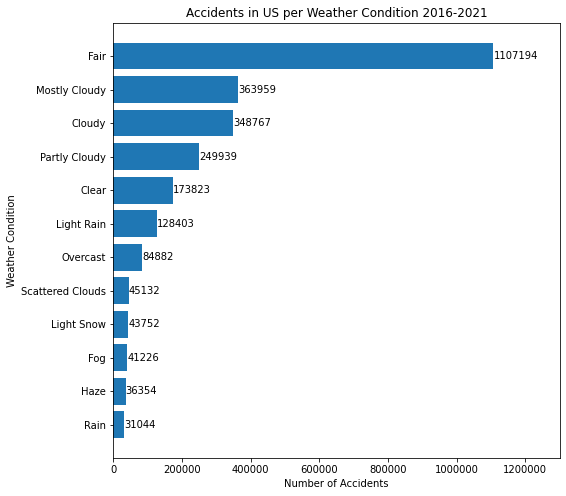

In [179]:
def plot_weather_accidents():
    ypos = np.arange(len(weather_condition_names))
    fig, ax = plt.subplots()
    hbars = ax.barh(ypos, weather_condition_values, align='center')

    ax.set_yticks(ypos, labels=weather_condition_names)
    ax.invert_yaxis()
    ax.set_xlabel('Number of Accidents')
    ax.set_ylabel('Weather Condition')
    ax.set_title('Accidents in US per Weather Condition 2016-2021')
    ax.bar_label(hbars, fmt='%d')
    ax.set_xlim(right=1300000)

    fig.set_figheight(8)
    fig.set_figwidth(8)

    plt.ticklabel_format(axis='x', style='plain')
    plt.show()
    
plot_weather_accidents()

# note that the total number of accidents used in this figure
# is about 95.7% of the number of accidents in the dataset
# as it does not include accidents with multiple weather conditions

In [9]:
"""
a majority of the accidents occur during "Fair" weather conditions, however it does also seem that cloudy conditions
have a substantial number of accidents
"""

'\na majority of the accidents occur during "Fair" weather conditions, however it does also seem that cloudy conditions\nhave a substantial number of accidents\n'

## Correlation Between Severity & Weather Conditions

In [10]:
print(df['Severity'].unique())
# damage severity is rated on a scale of 1-4 on this dataset, not great for indepth analysis

[3 2 4 1]


In [63]:
# average severity of accident per weather condition
def get_severity_avgs():
    severity_avgs = {}
    for i in weather_condition_names:
        temp_df = df.loc[df['Weather_Condition'] == i]
        temp_sum = temp_df['Severity'].sum()
        temp_count = temp_df['Severity'].count()
        temp_avg = round(temp_sum/temp_count, 3)
        severity_avgs[i] = temp_avg
    #     print(f'{i} {temp_avg}') 
    severity_avgs = dict(sorted(severity_avgs.items(), key = lambda x: x[1], reverse=True))
    return severity_avgs

severity_avgs = get_severity_avgs()
# print(severity_avgs)

{'Overcast': 2.502, 'Clear': 2.463, 'Scattered Clouds': 2.443, 'Light Snow': 2.197, 'Light Rain': 2.151, 'Mostly Cloudy': 2.141, 'Partly Cloudy': 2.135, 'Rain': 2.134, 'Fog': 2.093, 'Cloudy': 2.087, 'Haze': 2.079, 'Fair': 2.06}


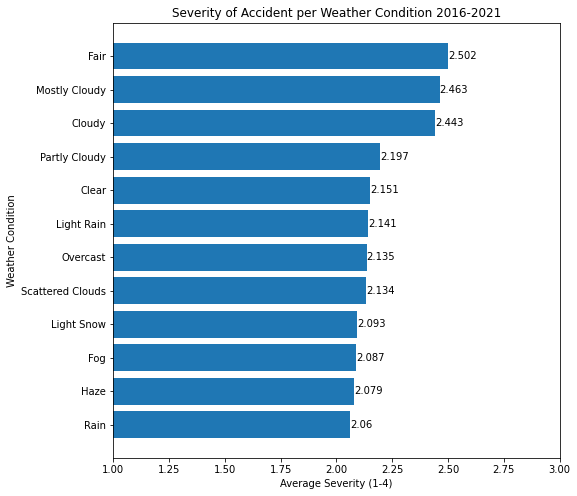

In [12]:
def plot_sev_weath_correlation():
    condition = list(severity_avgs.keys())
    severity = list(severity_avgs.values())

    ypos = np.arange(len(condition))
    fig, ax = plt.subplots()
    hbars = ax.barh(ypos, severity, align='center')

    ax.set_yticks(ypos, labels=weather_condition_names)
    ax.invert_yaxis()
    ax.set_xlabel('Average Severity (1-4)')
    ax.set_ylabel('Weather Condition')
    ax.set_title('Severity of Accident per Weather Condition 2016-2021')
    ax.bar_label(hbars, fmt='%g')
    ax.set_xlim(left=1, right=3)

    fig.set_figheight(8)
    fig.set_figwidth(8)

    plt.ticklabel_format(axis='x', style='plain')
    plt.show()

plot_sev_weath_correlation()

In [13]:
"""
the "Fair" weather condition seems to also have the most severe accidents on average.
additionally, there seems to be a correlation between the high number of accidents
and higher average severity under cloudy conditions.
"""

'\nthe "Fair" weather condition seems to also have the most severe accidents on average.\nadditionally, there seems to be a correlation between the high number of accidents\nand higher average severity under cloudy conditions.\n'

# Severity Percentages

In [ ]:
"""
severity is ranked from a scale of 1-4
there are no titles to these rankings so these arbritrary ones below will be used
1: minor
2: moderate
3: severe
4: extremely severe
"""

In [65]:
def get_severity_count():
    temp_series = pd.Series(dtype=float)
    for i in weather_condition_names:
        temp_df = df.loc[df['Weather_Condition'] == i]
        temp_count = temp_df['Severity'].value_counts().sort_index()
        temp_series = temp_series.add(temp_count, fill_value=0)
    temp_series = dict(sorted(temp_series.items(), key = lambda x: x[1], reverse=True))
    return temp_series

severity_count = get_severity_count()
print(severity_count)

{2: 2363181.0, 3: 144945.0, 4: 121631.0, 1: 24718.0}


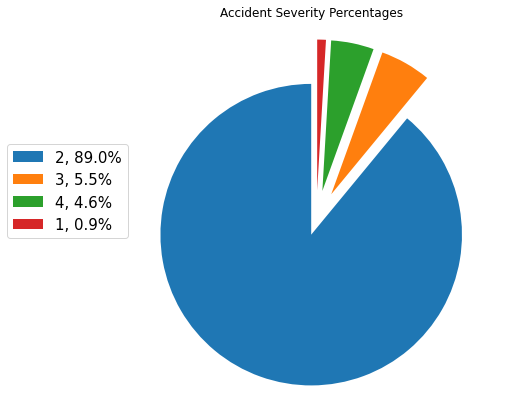

In [178]:
def plot_severity_percentages():
    labels = list(severity_count.keys())
    sizes = list(severity_count.values())
    explode = (0.1, 0.2, 0.2, 0.2)

    fig1, ax1 = plt.subplots(figsize=(7,7))
    ax1.pie(sizes, explode=explode, startangle=90)
    ax1.axis('equal')
    ax1.set_title('Accident Severity Percentages')

    plt.legend(
        loc='upper right',
        labels=['%s, %1.1f%%' % (
            l, (float(s) / total_general) * 100) for l, s in zip(labels, sizes)],
        prop={'size': 15},
        bbox_to_anchor=(0.05, 0.7),
    )


    plt.show()

plot_severity_percentages()

In [ ]:
"""
the majority (89%) of accidents were of moderate severity (2), and the greatest
minority was of minor severity (1).
"""